# TASK #1: UNDERSTAND THE PROBLEM STATEMENT  

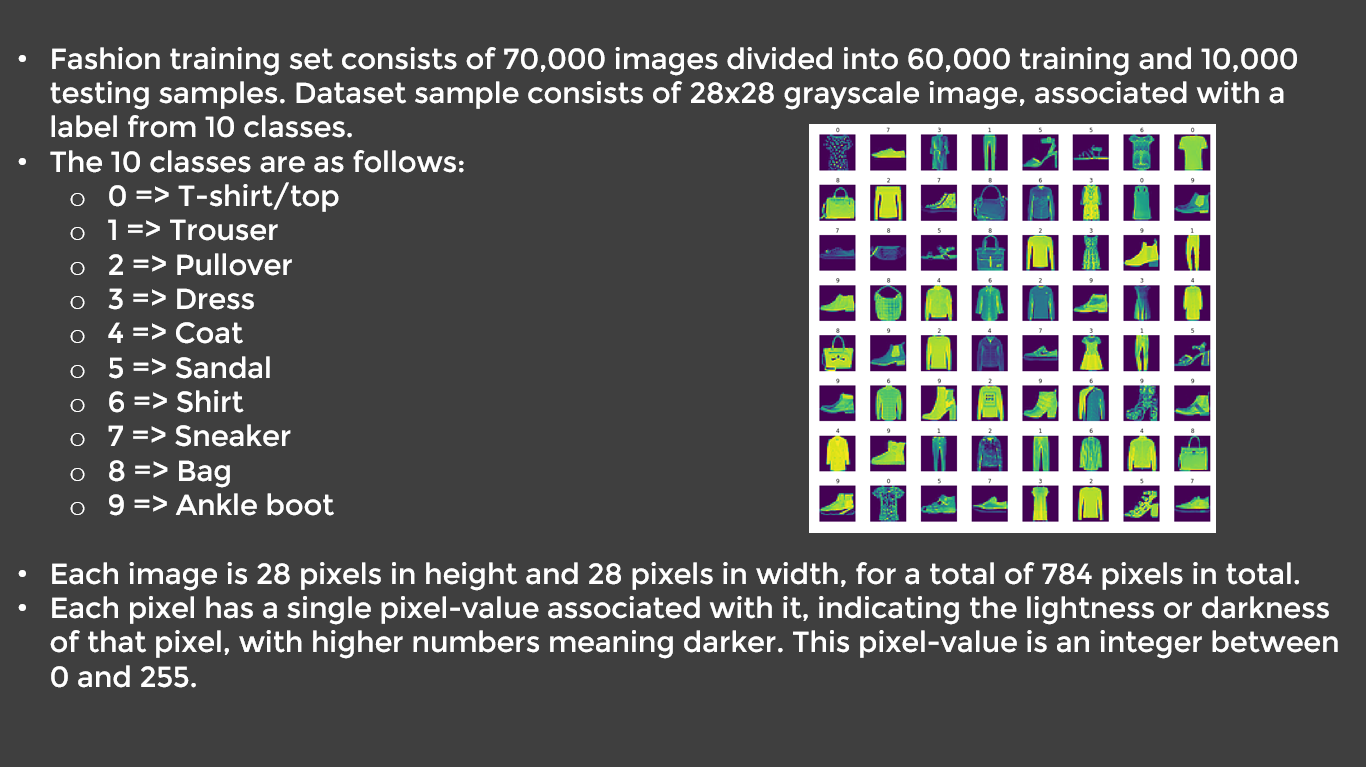

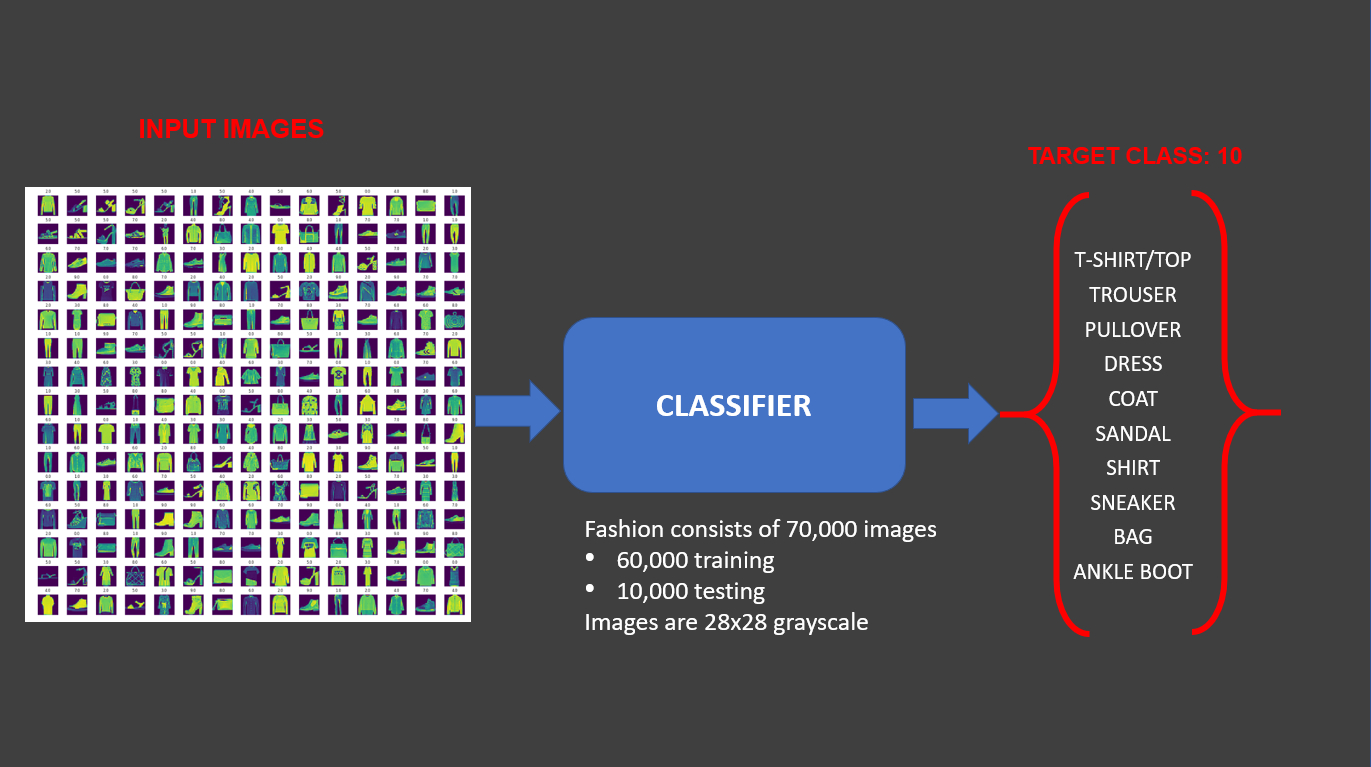

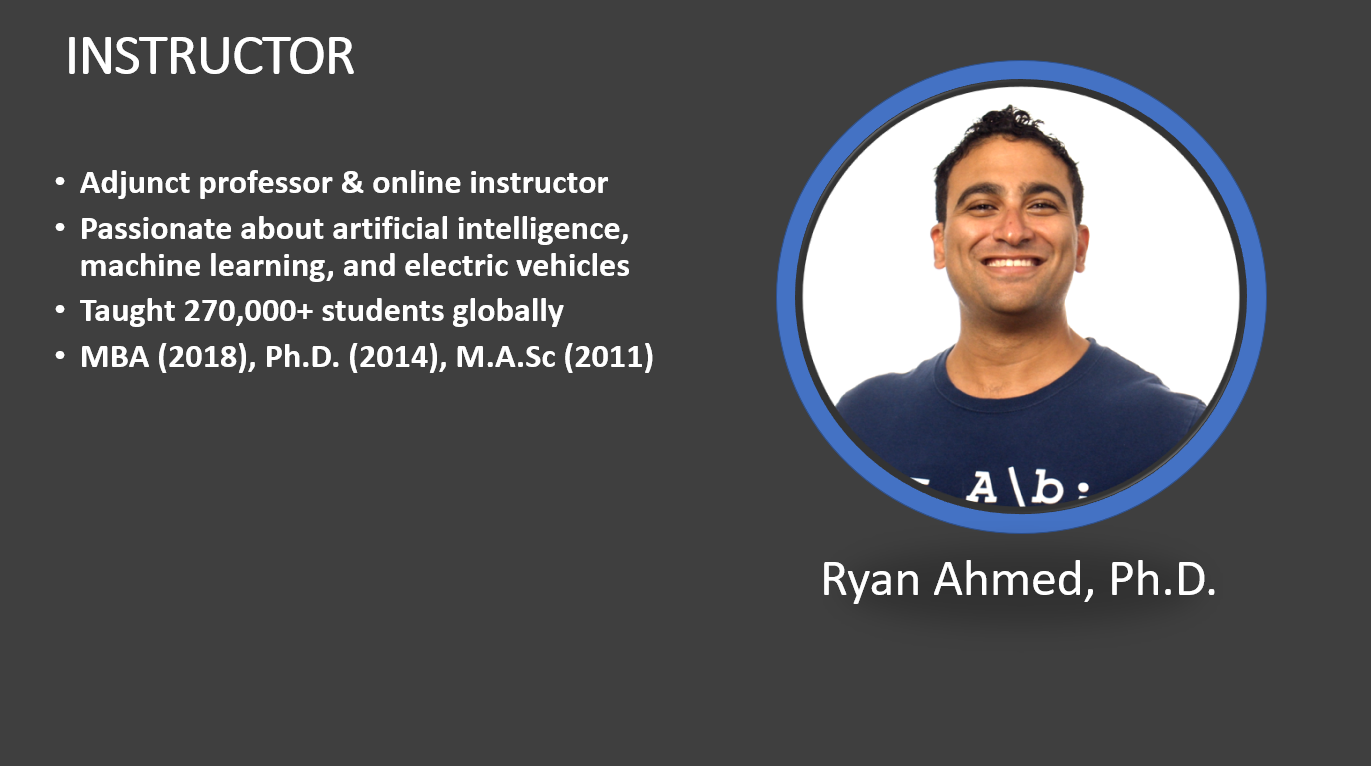

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

import matplotlib.pyplot as plt
# from jupyterthemes import jtplot
# jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [4]:
# Use the same dataset made readily available by keras Using the following lines of code:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 2s 0us/step


**PRACTICE OPPORTUNITY #1:**
- **Check out the sizes of both training and testing datasets**

# TASK #3: PERFORM DATA VISUALIZATION

5


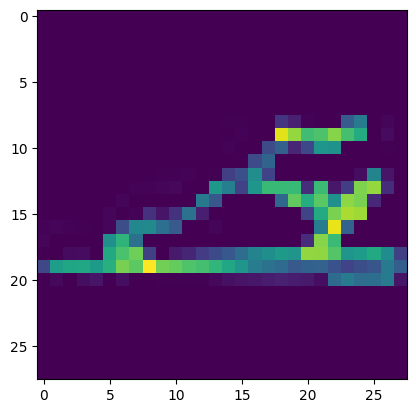

In [5]:
# Select a sample image and visualize it
i = 300
plt.imshow(X_train[i])
print(y_train[i])

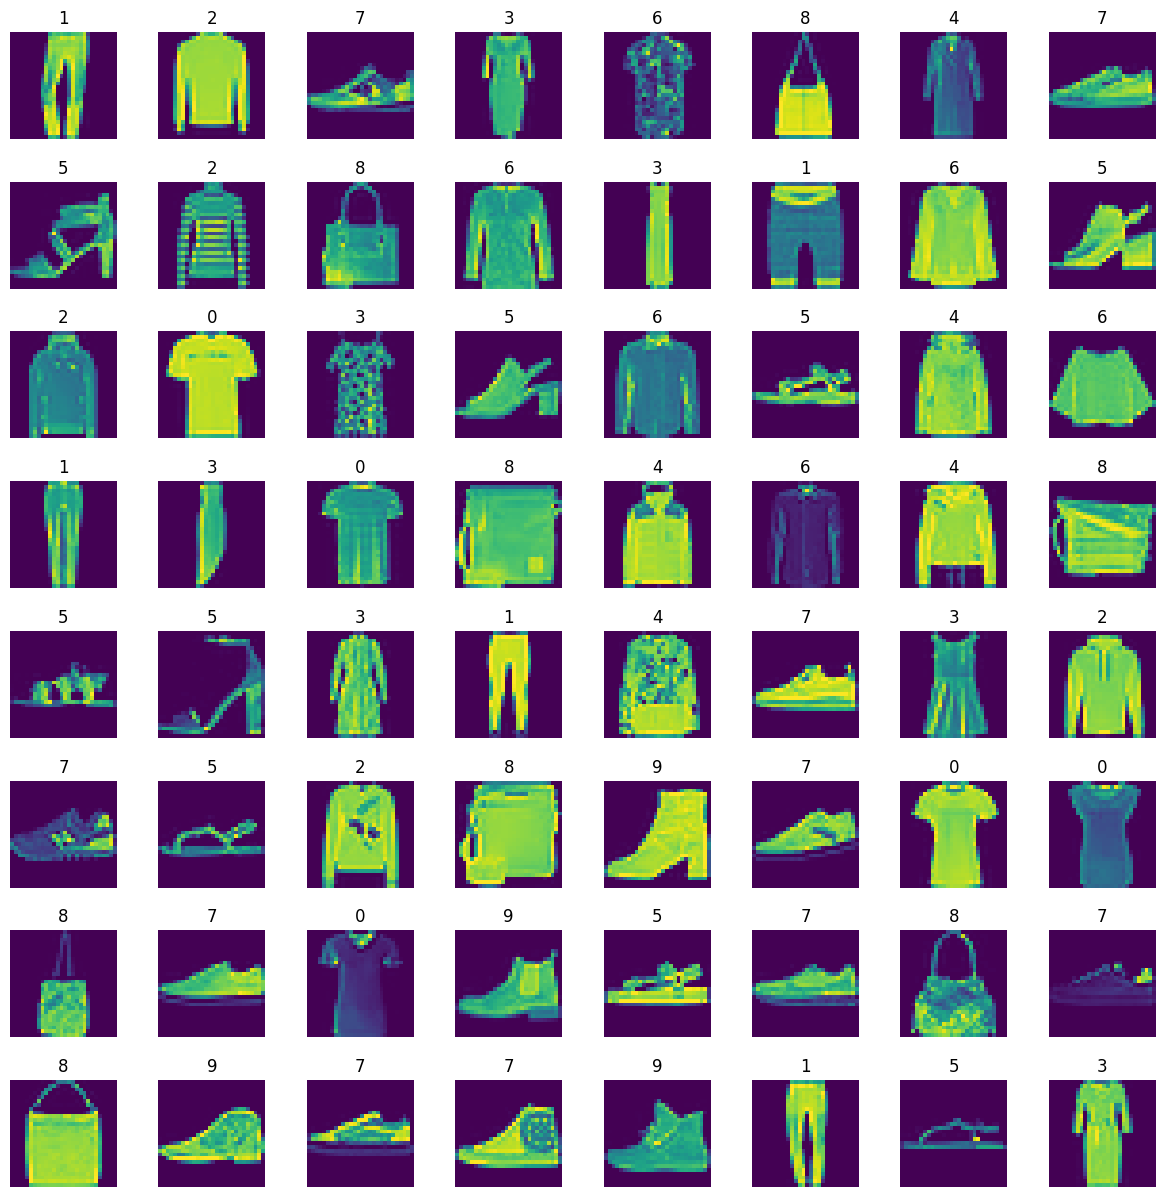

In [6]:
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot


W_grid = 8
L_grid = 8

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

**PRACTICE OPPORTUNITY #2:**
- **Plot a grid containing 144 images and perform a sanity check on the data** 

# TASK #4: PREPARE THE DATA FOR TRAINING

In [7]:
number_cat = 10
y_train = tf.keras.utils.to_categorical(y_train, number_cat)

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000, 10)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_train = np.expand_dims(X_train, axis=-1)

In [15]:
X_train.shape

(60000, 28, 28, 1)

In [16]:
y_train.shape

(60000, 10)

# TASK #5: BUILD A DEEP LEARNING MODEL

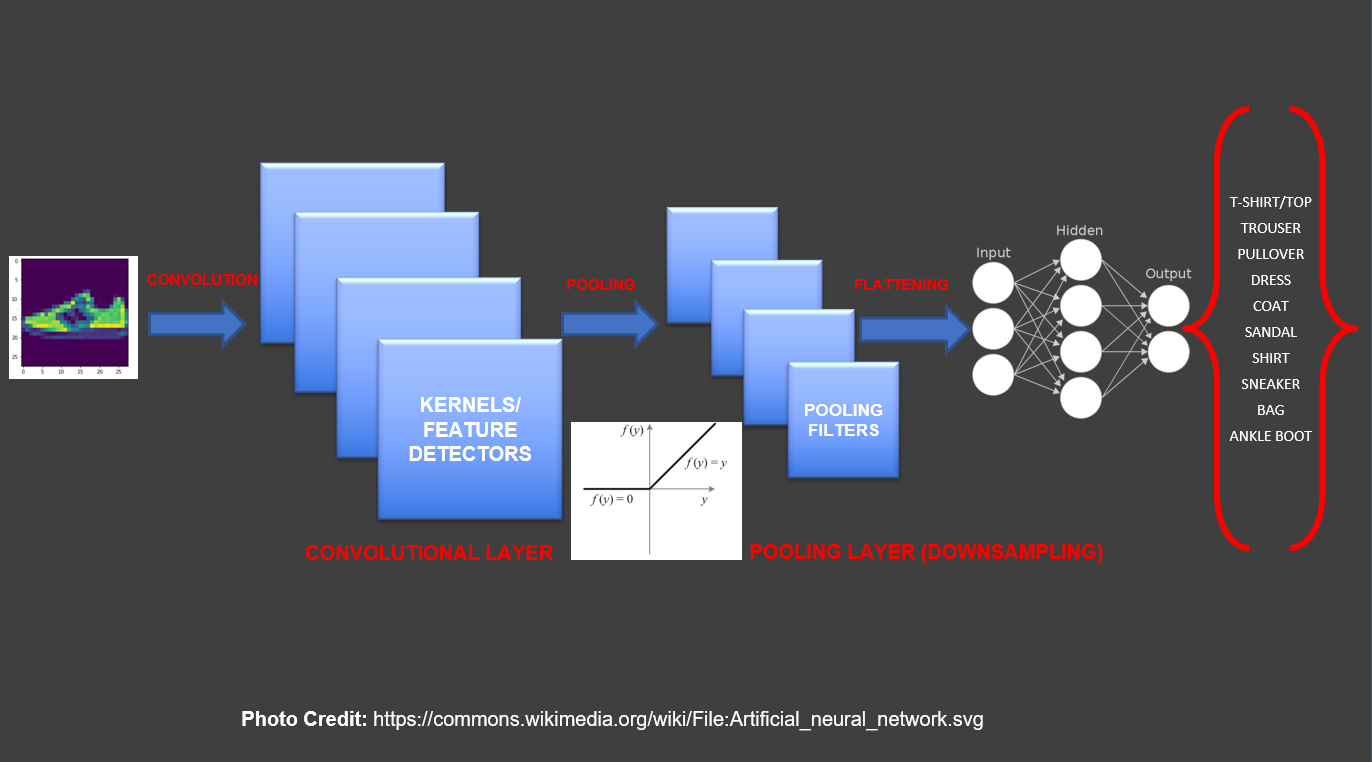

In [17]:
from tensorflow.keras import datasets, layers, models
cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)  ))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu' ))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu' ))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation = 'relu'))
cnn.add(layers.Dense(10, activation = 'softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

# TASK #6: COMPILE AND TRAIN A DEEP LEARNING MODEL

In [22]:
cnn.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics =['accuracy'])

In [23]:
X_train.shape

(60000, 28, 28, 1)

In [24]:
epochs = 25

history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)


Epoch 1/25
118/118 [==============================] - 16s 129ms/step - loss: 0.3893 - accuracy: 0.8663
Epoch 2/25
118/118 [==============================] - 15s 123ms/step - loss: 0.2773 - accuracy: 0.8993
Epoch 3/25
118/118 [==============================] - 14s 122ms/step - loss: 0.2437 - accuracy: 0.9103
Epoch 4/25
118/118 [==============================] - 15s 124ms/step - loss: 0.2250 - accuracy: 0.9167
Epoch 5/25
118/118 [==============================] - 15s 125ms/step - loss: 0.2114 - accuracy: 0.9220
Epoch 6/25
118/118 [==============================] - 15s 127ms/step - loss: 0.2012 - accuracy: 0.9258
Epoch 7/25
118/118 [==============================] - 15s 124ms/step - loss: 0.1810 - accuracy: 0.9326
Epoch 8/25
118/118 [==============================] - 14s 122ms/step - loss: 0.1668 - accuracy: 0.9385
Epoch 9/25
118/118 [==============================] - 14s 117ms/step - loss: 0.1561 - accuracy: 0.9414
Epoch 10/25
118/118 [==============================] - 15s 124ms/step - l

In [27]:
cnn.save('AdamEpochs25.h5')

# TASK #7: ASSESS TRAINED MODEL PERFORMANCE

In [25]:
X_test.shape

(10000, 28, 28)

In [26]:
X_test = np.expand_dims(X_test, axis=-1)

In [28]:
X_test.shape

(10000, 28, 28, 1)

In [29]:
y_test.shape

(10000, 10)

In [30]:
evaluation = cnn.evaluate(X_test, y_test) 

313/313 [==============================] - 1s 4ms/step - loss: 0.4996 - accuracy: 0.8940


In [31]:
X_test = X_test.astype('float')


In [32]:
predicted_classes = cnn.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [33]:
predicted_classes

array([[7.0070838e-24, 6.8719419e-18, 1.6015399e-24, ..., 2.1721277e-15,
        1.8761563e-18, 1.0000000e+00],
       [5.4241587e-11, 3.7856177e-19, 1.0000000e+00, ..., 1.7696445e-21,
        1.1988396e-12, 9.5257196e-27],
       [1.9981588e-23, 1.0000000e+00, 1.4360525e-27, ..., 1.6069206e-37,
        5.0530426e-24, 0.0000000e+00],
       ...,
       [1.5999592e-23, 1.3343605e-30, 1.4446995e-29, ..., 3.9474797e-30,
        1.0000000e+00, 7.9623528e-33],
       [1.4627894e-21, 1.0000000e+00, 8.9570146e-21, ..., 1.3910389e-31,
        1.8900750e-21, 5.9469112e-36],
       [2.2388193e-08, 5.7863327e-09, 1.7887244e-09, ..., 2.7084512e-05,
        9.3238822e-07, 1.8042033e-11]], dtype=float32)

In [34]:
predicted_classes=np.argmax(predicted_classes,axis=1)


In [35]:
predicted_classes

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [36]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [37]:
y_test = y_test.argmax(1)

In [38]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

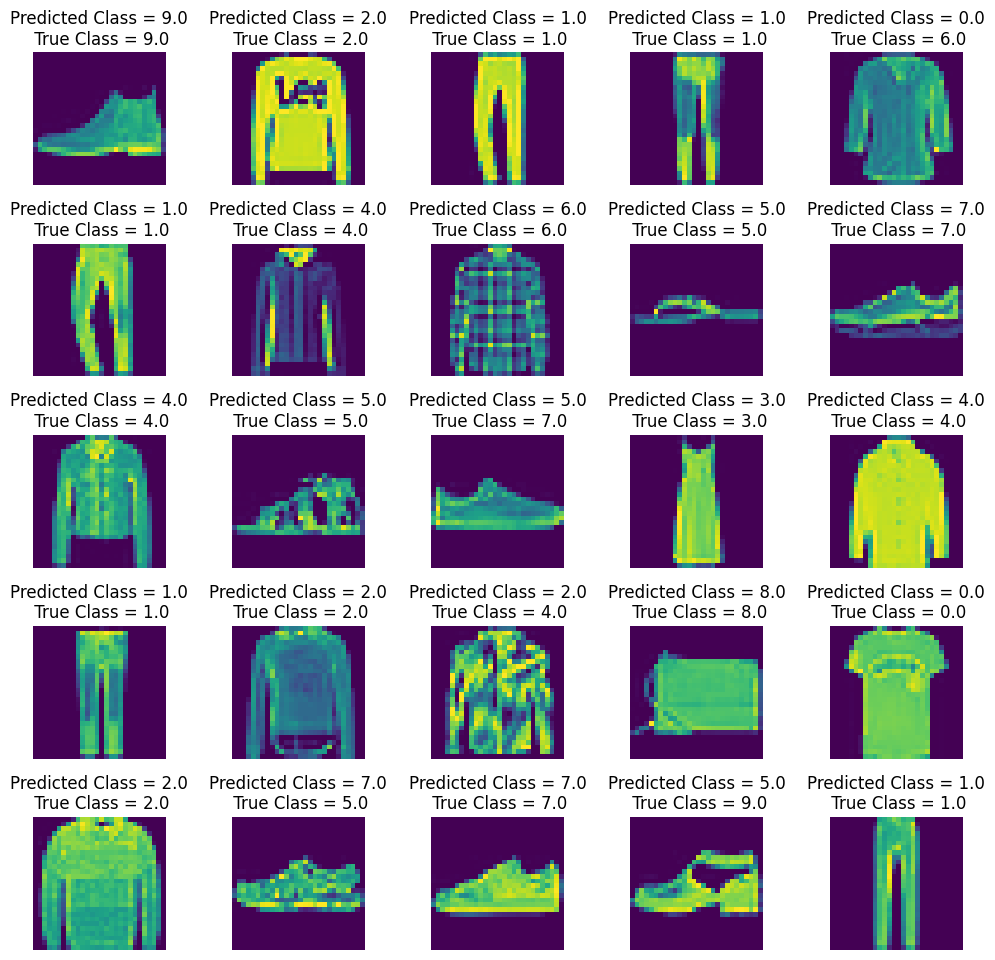

In [39]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Predicted Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

<Axes: >

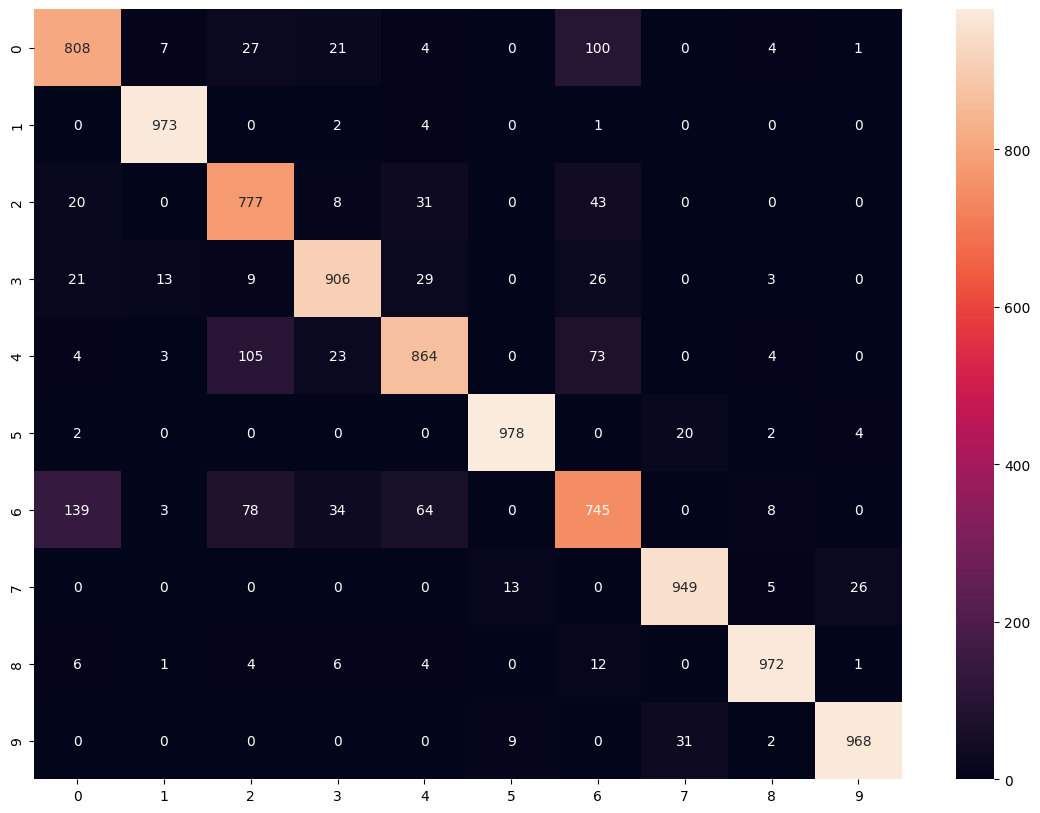

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predicted_classes, y_test)
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot = True, fmt = 'd')

In [41]:
from sklearn.metrics import classification_report

num_classes = 10

target_names = ['class {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     class 0       0.83      0.81      0.82      1000
     class 1       0.99      0.97      0.98      1000
     class 2       0.88      0.78      0.83      1000
     class 3       0.90      0.91      0.90      1000
     class 4       0.80      0.86      0.83      1000
     class 5       0.97      0.98      0.98      1000
     class 6       0.70      0.74      0.72      1000
     class 7       0.96      0.95      0.95      1000
     class 8       0.97      0.97      0.97      1000
     class 9       0.96      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



**PRACTICE OPPORTUNITY #3:**
- **Add a new dense layer containing 1024 neurons**
- **Increase the number of epochs**
- **Plot the model summary and determine the number of trainable parameters**
- **Retrain the model and evaluate its performance**

# GREAT JOB!

# PRACTICE OPPORTUNITIES SOLUTIONS 

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **Check out the sizes of both training and testing datasets**

In [35]:
X_train.shape

(60000, 28, 28, 1)

In [36]:
X_test.shape

(10000, 28, 28, 1)

In [37]:
y_train.shape

(60000, 10)

In [38]:
y_test.shape

(10000,)

**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Plot a grid containing 144 images and perform a sanity check on the data** 

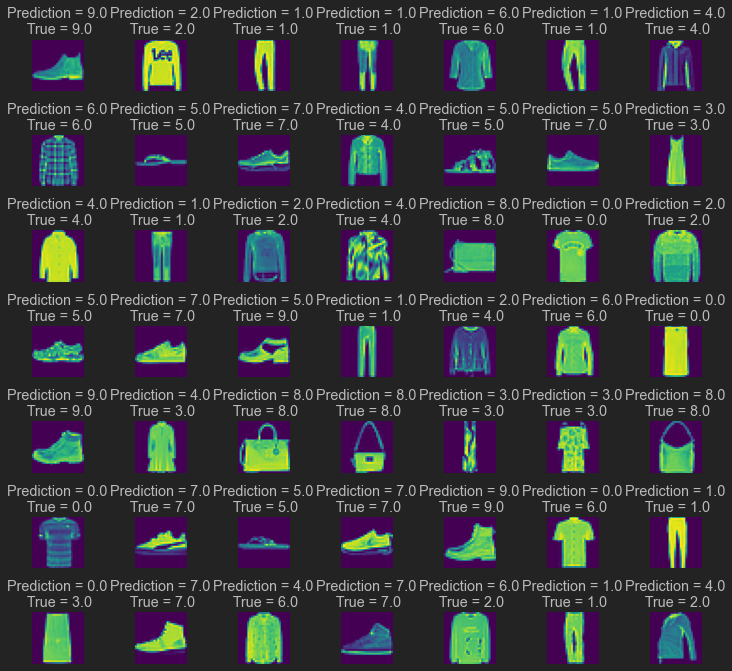

In [39]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction = {:0.1f}\n True = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

**PRACTICE OPPORTUNITY #3 SOLUTION:**
- **Add a new dense layer containing 1024 neurons**
- **Increase the number of epochs**
- **Plot the model summary and determine the number of trainable parameters**
- **Retrain the model and evaluate its performance**

In [40]:
from tensorflow.keras import datasets, layers, models
cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)  ))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu' ))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu' ))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation = 'relu'))
cnn.add(layers.Dense(1000, activation = 'relu'))
cnn.add(layers.Dense(10, activation = 'softmax'))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               